# **Informações sobre o dataset:**

Este conjunto de dados contém informações médicas e de estilo de vida de 1500 pacientes, projetado para prever a presença de câncer com base em diversas características. O conjunto de dados é estruturado para fornecer um desafio realista para a modelagem preditiva na área médica.


<br><br>


**Age:** Valores inteiros que representam a idade do paciente, variando de 20 a 80 anos.


**Gender:** Valores binários que representam o gênero, onde 0 indica Masculino e 1 indica Feminino.


**BMI:** Valores contínuos que representam o Índice de Massa Corporal (IMC), variando de 15 a 40.


**Smoking:** Valores binários que indicam se você fuma ou não, onde 0 significa Não e 1 significa Sim.


**GeneticRisk**: Valores categóricos que representam os níveis de risco genético para câncer, sendo 0 indicativo de baixo risco, 1 de risco médio e 2 de risco alto.


**PhysicalActivity**: Valores contínuos que representam o número de horas por semana dedicadas a atividades físicas, variando de 0 a 10.


**AlcoholIntake**: Valores contínuos que representam o número de unidades de álcool consumidas por semana, variando de 0 a 5.


**CancerHistory**: Valores binários que indicam se o paciente tem histórico pessoal de câncer, onde 0 significa Não e 1 significa Sim.


**Diagnosis**: Valores binários que indicam o status do diagnóstico de câncer, onde 0 indica Sem Câncer e 1 indica Câncer.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# **Análise Exploratória**

## 1. Quantas linhas e colunas possui o dataset? Existem nulos?

In [6]:
print(f'Quantidade de linhas: {df.shape[0]}')
print(f'Quantidade de colunas: {df.shape[1]}')


Quantidade de linhas: 1500
Quantidade de colunas: 9


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


Não há nulos neste dataset.

## 2. Qual a idade mais frequente do conjunto de dados?

In [8]:
df['Age'].value_counts()

,count
Age,
52,38
45,37
79,33
66,33
70,32
...,...
37,18
69,18
62,15


In [9]:
df['Age'].mode()

,Age
0,52


A idade mais frequente é 52 anos.

## 4. Fumantes têm mais câncer que não fumantes?

In [10]:
# Verificar com Tabela de contingência (contagem de ambos)
tabela = pd.crosstab(df['Smoking'], df['Diagnosis'])
print("Tabela de contingência:")
print(tabela)

Tabela de contingência:
Diagnosis    0    1
Smoking            
0          762  334
1          181  223


In [11]:
# Verificar por proporção de fumantes e não fumantes
proporcoes = pd.crosstab(df['Smoking'], df['Diagnosis'], normalize='index') * 100
print("\nPercentual de câncer por grupo:")
print(proporcoes)


Percentual de câncer por grupo:
Diagnosis          0          1
Smoking                        
0          69.525547  30.474453
1          44.801980  55.198020


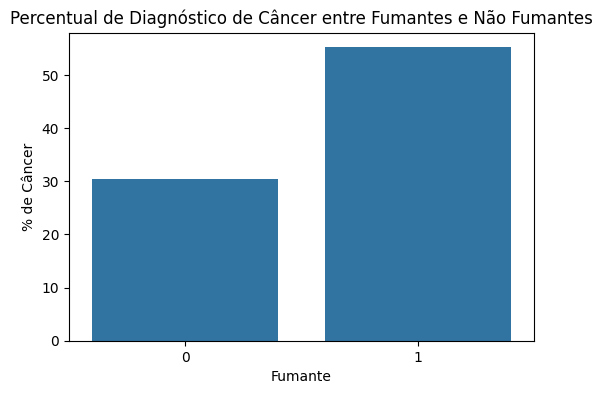

In [12]:
# Visualizar proporção por gráfico
plt.figure(figsize=(6,4))
sns.barplot(
    data=proporcoes.reset_index(),
    x='Smoking',
    y=proporcoes.columns[1],  # ou nome da coluna que representa "câncer"
)

plt.title("Percentual de Diagnóstico de Câncer entre Fumantes e Não Fumantes")
plt.ylabel("% de Câncer")
plt.xlabel("Fumante")
plt.show()

Fumantes apresentam muito mais câncer do que não fumantes.

## 5. Qual a proporção das classes da variável alvo? Tem mais pacientes diagnosticados com câncer ou sem câncer? As classes são desbalanceadas?

In [13]:
# Verificar contagem das classes
df['Diagnosis'].value_counts()


,count
Diagnosis,
0,943
1,557


In [15]:
# Verificar proporção das classes
df['Diagnosis'].value_counts(normalize=True) * 100


,proportion
Diagnosis,
0,62.866667
1,37.133333


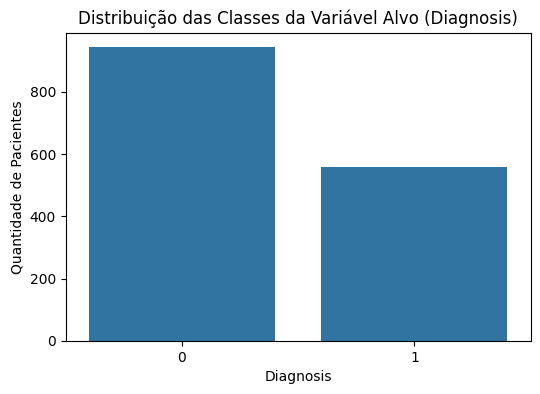

In [17]:
contagem = df['Diagnosis'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=contagem.index, y=contagem.values)
plt.title("Distribuição das Classes da Variável Alvo (Diagnosis)")
plt.ylabel("Quantidade de Pacientes")
plt.xlabel("Diagnosis")
plt.show()

Não é um problema de extremo desbalanceamento, mas a proporção das classes é diferente.

## 6. Qual a distribuição das variáveis numéricas? Alguma delas apresentam distribuição normal? Ou todas são assimétricas?

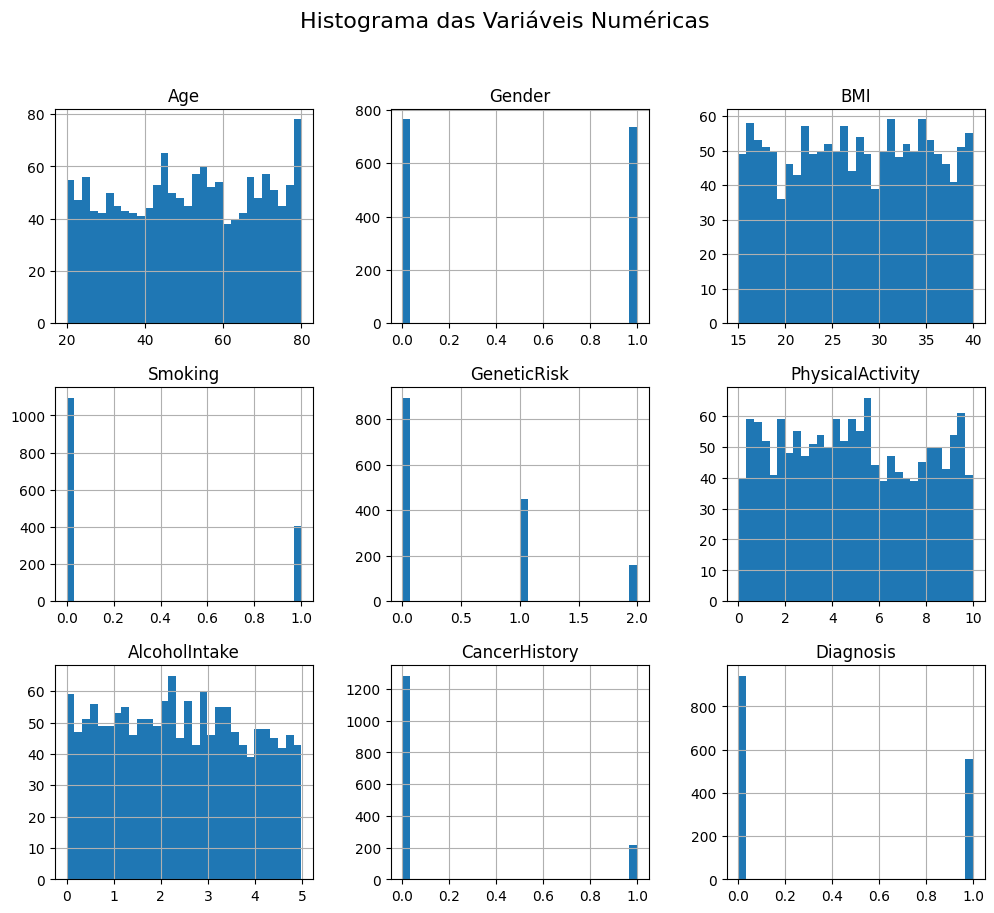

In [18]:
# Visualizar todos os histogramas das variáveis numéricas
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograma das Variáveis Numéricas", fontsize=16)
plt.show()

Todas são assimétricas.

# ------**Construção do Modelo**--------

## 1. Divisão das variáveis em X e y

In [19]:
# Separar X e y
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

## 2. Divisão em treino e teste

In [20]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 3. Normalização dos dados

In [21]:
# 1. Criar o scaler
scaler = StandardScaler()

# 2. Ajustar o scaler nos dados de treino e transformar X_train
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformar X_test usando o scaler já treinado
X_test_scaled = scaler.transform(X_test)

## 4. Escolha e Treinamento do Modelo

In [22]:
# Definir o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)

In [23]:
# Treinar o modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## 5. Previsões

In [24]:
# Fazer previsões
y_pred = model.predict(X_test_scaled)

## 6. Avaliação das previsões

In [25]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.80      0.77      0.79       111

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



## ------ Modelo de Árvore de Decisão